In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN"]
data = yf.download(tickers, start='2024-01-01', end='2024-11-17')

[*********************100%***********************]  4 of 4 completed


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.tail(2)['Close']

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2024-11-14 00:00:00+00:00,228.220001,211.479996,175.580002,426.890015
2024-11-15 00:00:00+00:00,225.000000,202.610001,172.490005,415.000000


In [5]:
close_prices = data['Close'].loc['2024-10-01':'2024-11-14']
close_prices = close_prices.asfreq('B')

<Axes: xlabel='Date'>

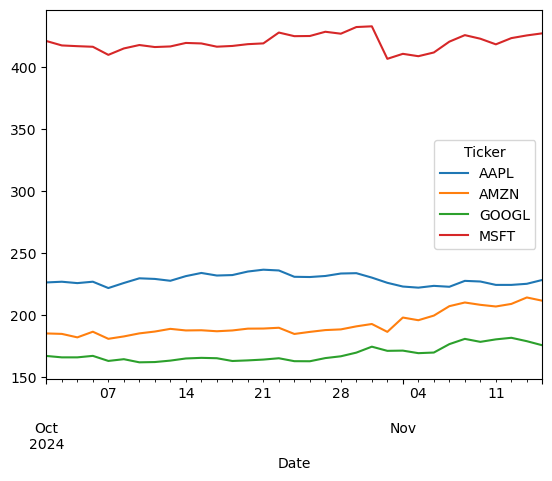

In [6]:
close_prices.plot()

In [7]:
from statsmodels.tsa.statespace.tools import diff 
diffprices=diff(close_prices, k_diff=1, k_seasonal_diff=None, seasonal_periods=2)

In [8]:
prices = close_prices
# prices = diffprices
stock_ticker = 'AAPL'

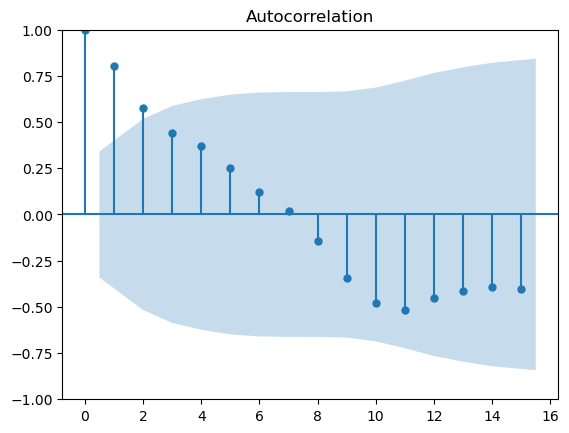

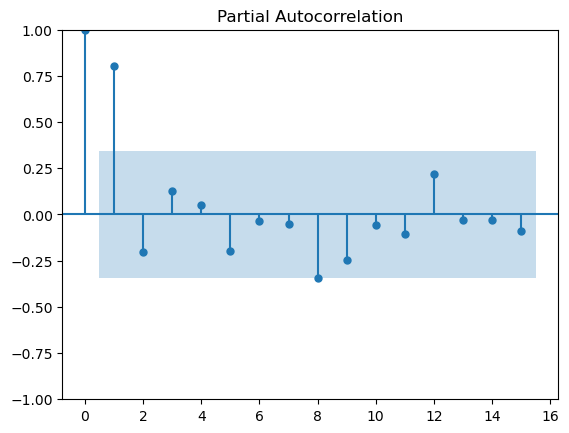

In [9]:
sm.graphics.tsa.plot_acf(prices[stock_ticker], lags=15) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(prices[stock_ticker], lags=15)
plt.show()

In [10]:
mod = sm.tsa.SARIMAX(prices[stock_ticker], order=(1, 0, 0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                   33
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -82.522
Date:                Sun, 17 Nov 2024   AIC                            169.045
Time:                        01:34:59   BIC                            172.038
Sample:                    10-01-2024   HQIC                           170.052
                         - 11-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    501.126      0.000       0.996       1.004
sigma2         6.6324      1.989      3.335      0.001       2.734      10.530
Ljung-Box (L1) (Q):                   0.33   Jarque-

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [11]:
res.forecast(2)

2024-11-15 00:00:00+00:00    228.205342
2024-11-18 00:00:00+00:00    228.190683
Freq: B, Name: predicted_mean, dtype: float64